In [1]:
N = 13
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]
col

'Time_on_Education'

In [2]:
import pandas as pd

data = pd.read_csv("./datasets/teen_phone_addiction_dataset.csv")

In [3]:
mean = sum(data[col]) / len(data[col])
mean

1.0163333333333333

In [4]:
import numpy as np
np.mean(data[col])

np.float64(1.0163333333333333)

In [5]:
variance = sum((x - mean) ** 2 for x in data[col]) / len(data[col])
variance

0.4202065555555556

In [6]:
np.var(data[col])

np.float64(0.42020655555555564)

In [7]:
def calculate_mode(data):
    
    frequency_dict = {}
    for value in data:
        frequency_dict[value] = frequency_dict.get(value, 0) + 1
    
    
    max_frequency = max(frequency_dict.values())
    
   
    all_same_frequency = all(freq == max_frequency for freq in frequency_dict.values())
    if all_same_frequency:
        return None  
    
    
    modes = [value for value, freq in frequency_dict.items() if freq == max_frequency]
    
    
    sorted_modes = sorted(modes)
    
   
    def are_neighbors(modes_list):
        if len(modes_list) <= 1:
            return True
        
        for i in range(1, len(modes_list)):
            
            current_index = data.index(modes_list[i-1])
            next_index = data.index(modes_list[i])
            if abs(next_index - current_index) != 1:
                return False
        return True
    
    
    if len(modes) == 1:
        return modes[0]
    
    
    if are_neighbors(sorted_modes):
        
        return sum(modes) / len(modes)
    else:
        
        return modes
mode = calculate_mode(data[col])
mode

0.0

In [8]:
import scipy

scipy.stats.mode(data[col])

ModeResult(mode=np.float64(0.0), count=np.int64(250))

In [9]:
def calculate_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    if n % 2 == 0:
        return (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        return sorted_data[n//2]
median = calculate_median(data[col])
median

1.0

In [10]:
np.median(data[col])

np.float64(1.0)

In [11]:
np.quantile(data[col], 0.25)

np.float64(0.5)

In [12]:
np.quantile(data[col], 0.5)

np.float64(1.0)

In [13]:
np.quantile(data[col], 0.75)

np.float64(1.5)

In [14]:
import math
std_dev = math.sqrt(variance)
n = len(data[col])
mu4 = sum((x - mean) ** 4 for x in data[col]) / n
kurtosis = mu4 / (std_dev ** 4) - 3
kurtosis

-0.39997284929065424

In [15]:
scipy.stats.kurtosis(data[col])

np.float64(-0.39997284929065513)

In [16]:
mu3 = sum((x - mean) ** 3 for x in data[col]) / n
skewness = mu3 / (std_dev ** 3)
skewness

0.34002789690434687

In [17]:
scipy.stats.skew(data[col])

np.float64(0.34002789690434665)

In [18]:
np.quantile(data[col], 0.75) - np.quantile(data[col], 0.25)

np.float64(1.0)

In [19]:
scipy.stats.iqr(data[col])

np.float64(1.0)

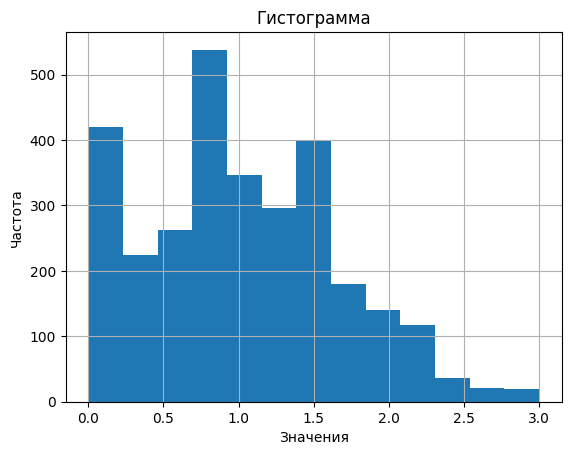

In [20]:
import matplotlib.pyplot as plt

n = len(data[col])
data[col].hist(bins=1 + int(1 + int(np.log2(n))))
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.show()

In [21]:
def empirical_distribution_function(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    
    k = 1 + int(math.log2(n))
    
    x_min = min(data)
    x_max = max(data)
    h = (x_max - x_min) / k  
    
    
    a = [x_min + i * h for i in range(k + 1)]
    
    
    cumulative_freq = [0]
    current_index = 0  
    
    for i in range(1, k + 1):
        count = 0
        while (current_index < n and 
               sorted_data[current_index] < a[i]):
            count += 1
            current_index += 1
        
        cumulative_freq.append(cumulative_freq[-1] + count)
    
    
    cumulative_freq = [freq / n for freq in cumulative_freq]
    
    return a, cumulative_freq

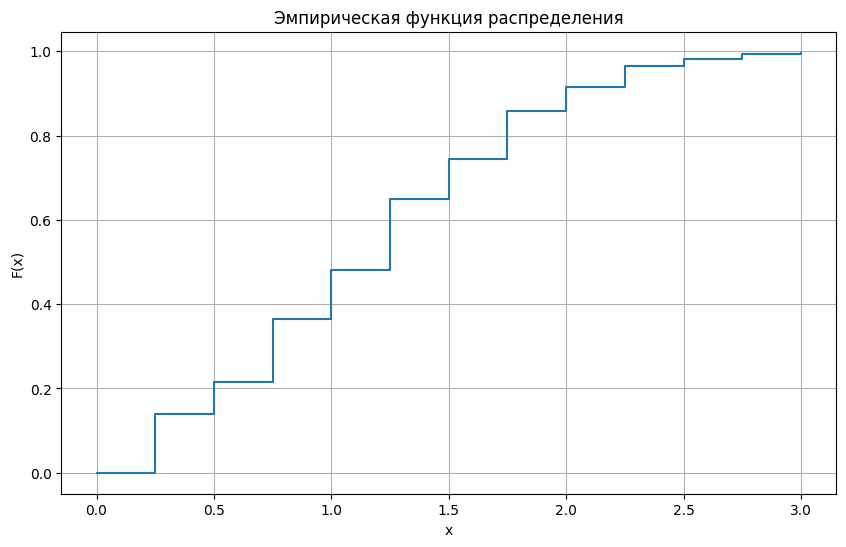

In [22]:
plt.figure(figsize=(10, 6))
plt.step(*empirical_distribution_function(data[col]), where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()

In [23]:
from scipy import stats
from scipy.stats import norm, chi2
import typing as tp


def qhi(data: tp.List[float], e=0.05) -> bool:
    n = len(data)
    k = 1 + int(np.log2(n))
    intervals = np.linspace(min(data), max(data), k + 1)
    real_freq, bin_edges = np.histogram(data, bins=intervals)
    expected_freq = np.array([norm.cdf(bin_edges[i + 1], np.mean(data), np.sqrt(np.var(data, ddof=1, axis=0))) - norm.cdf(
        bin_edges[i], np.mean(data), np.sqrt(np.var(data, ddof=1, axis=0))) for i in range(k)]) * n
    chi_stat = np.sum((real_freq - expected_freq) ** 2 / (expected_freq + 1e-6))
    deg = k - 1 - 2
    crit_val = chi2.ppf(0.95, deg)
    return chi_stat < crit_val

In [24]:
qhi(data[col])

np.False_

In [25]:
se_skewness = math.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
se_kurtosis = math.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))

In [26]:
skewness < se_skewness

False

In [27]:
kurtosis < se_kurtosis

True

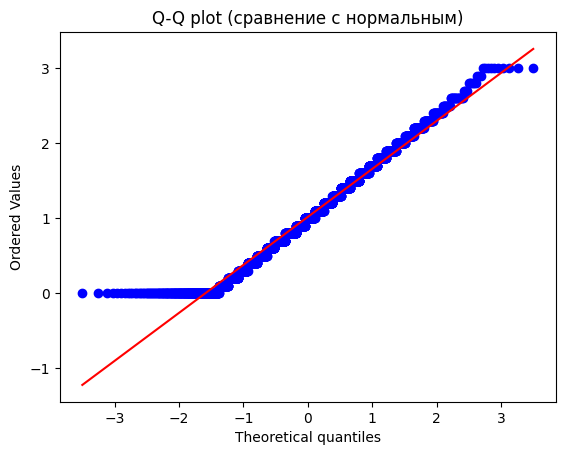

In [28]:
from scipy import stats
stats.probplot(data[col], dist="norm", plot=plt)
plt.title("Q-Q plot (сравнение с нормальным)")
plt.show()

In [29]:
std = variance ** 0.5
standardized_data = [(x - mean) / std for x in data[col]]


In [30]:
np.mean(standardized_data)

np.float64(8.289665250534503e-17)

In [31]:
np.var(standardized_data)

np.float64(1.0)

In [32]:
scipy.stats.mode(standardized_data)

ModeResult(mode=np.float64(-1.5678508937991076), count=np.int64(250))

In [33]:
np.median(standardized_data)

np.float64(-0.02519668540379015)

In [34]:
np.quantile(standardized_data, 0.25)

np.float64(-0.7965237896014489)

In [35]:
np.quantile(standardized_data, 0.5)

np.float64(-0.02519668540379015)

In [36]:
np.quantile(standardized_data, 0.75)

np.float64(0.7461304187938687)

In [37]:
scipy.stats.kurtosis(standardized_data)

np.float64(-0.39997284929065424)

In [38]:
scipy.stats.skew(standardized_data)

np.float64(0.3400278969043469)

In [39]:
scipy.stats.iqr(standardized_data)

np.float64(1.5426542083953176)

In [40]:
qhi(standardized_data)

np.False_

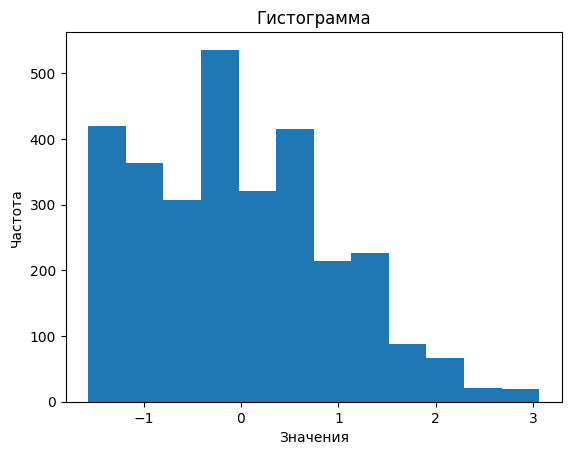

In [41]:
n = len(standardized_data)
plt.hist(standardized_data, bins=1 + int(np.log2(n)))
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.show()

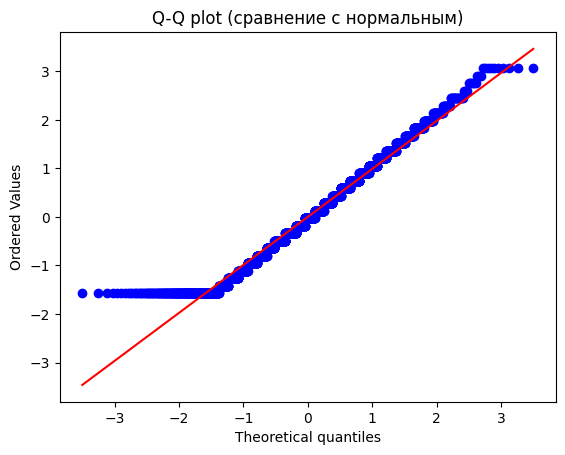

In [42]:
from scipy import stats
stats.probplot(standardized_data, dist="norm", plot=plt)
plt.title("Q-Q plot (сравнение с нормальным)")
plt.show()

In [43]:
import pandas as pd

groups = pd.DataFrame(data).groupby("School_Grade")

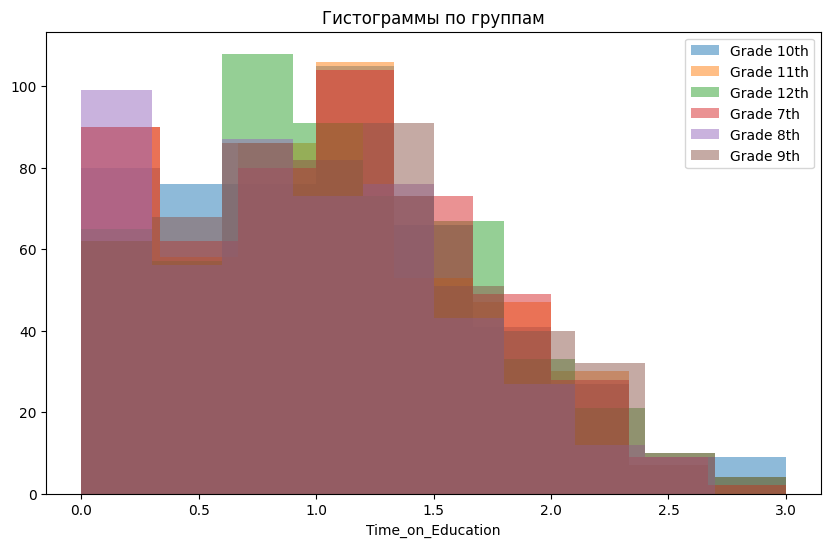

In [44]:
plt.figure(figsize=(10, 6))
for grade, subset in groups:
    k = 1 + int(np.log2(len(subset)))
    plt.hist(subset[col], bins=k, alpha=0.5, label=f"Grade {grade}")

plt.xlabel(col)
plt.ylabel("")
plt.title("Гистограммы по группам")
plt.legend()
plt.show()

In [45]:
groups[col].agg(["mean", "var"])

,mean,var
School_Grade,,
10th,1.028542,0.448710
11th,0.991649,0.409888
12th,1.024008,0.400313
7th,1.021328,0.418375
8th,0.975311,0.423859
9th,1.052662,0.422764
